# Бэггинг и случайный лес

Загрузите датасет digits с помощью функции load_digits из sklearn.datasets и подготовьте матрицу признаков X и ответы на обучающей выборке y (вам потребуются поля data и target в объекте, который возвращает load_digits).

Для оценки качества далее нужно будет использовать cross_val_score из sklearn.model_selection с параметром cv=10. Эта функция реализует k-fold cross validation c k равным значению параметра cv. Мы предлагаем использовать k=10, чтобы полученные оценки качества имели небольшой разброс, и было проще проверить полученные ответы. На практике же часто хватает и k=5. Функция cross_val_score будет возвращать numpy.ndarray, в котором будет k чисел - качество в каждом из k экспериментов k-fold cross validation. Для получения среднего значения (которое и будет оценкой качества работы) вызовите метод .mean() у массива, который возвращает cross_val_score.

1. Создайте DecisionTreeClassifier с настройками по умолчанию и измерьте качество его работы с помощью cross_val_score. 
    Эта величина и будет ответом в пункте 1.

In [10]:
from sklearn.datasets import load_digits
import pandas as pd
from sklearn import datasets, tree, model_selection, ensemble
from sklearn.model_selection import cross_val_score

from math import sqrt

import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

digits = load_digits()
print(digits.data.shape)

(1797, 64)


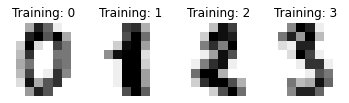

In [11]:
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:4]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)

In [12]:
X = digits.data
y = digits.target

In [13]:
clf         = tree.DecisionTreeClassifier()
x_val_score = cross_val_score(clf, X, y, cv=10).mean()
print(x_val_score)

0.8246958410924892


2. Воспользуйтесь BaggingClassifier из sklearn.ensemble, чтобы обучить бэггинг над DecisionTreeClassifier. Используйте в BaggingClassifier параметры по умолчанию, задав только количество деревьев равным 100. Качество классификации новой модели - ответ в пункте 2. Обратите внимание, как соотносится качество работы композиции решающих деревьев с качеством работы одного решающего дерева.

In [14]:
bagging_clf = ensemble.BaggingClassifier(clf, n_estimators=100)
x_val_score = cross_val_score(bagging_clf, X, y, cv=10).mean()
print(x_val_score)

0.9259404096834263


3. Теперь изучите параметры BaggingClassifier и выберите их такими, чтобы каждый базовый алгоритм обучался не на всех d признаках, а на корень из d случайных признаков. Качество работы получившегося классификатора - ответ в пункте 3. Корень из числа признаков - часто используемая эвристика в задачах классификации, в задачах регрессии же часто берут число признаков, деленное на три. Но в общем случае ничто не мешает вам выбирать любое другое число случайных признаков.

In [15]:
stoch_train_len = int(sqrt(X.shape[1]))

bagging_clf = ensemble.BaggingClassifier(clf, n_estimators=100, max_features=stoch_train_len)
x_val_score = cross_val_score(bagging_clf, X, y, cv=10).mean()
print(x_val_score)

0.9354469273743016


4. Чтобы выбирать случайные признаки  при построении каждой вершины дерева - нужно убрать выбор случайного подмножества признаков в BaggingClassifier и добавить его в DecisionTreeClassifier. Какой параметр за это отвечает, можно понять из документации sklearn, либо просто попробовать угадать (скорее всего, у вас сразу получится). Попробуйте выбирать опять же корень из d признаков. Качество полученного классификатора на контрольной выборке и будет ответом в пункте 4.

In [16]:
stoch_clf       = tree.DecisionTreeClassifier(max_features=stoch_train_len)
bagging_clf     = ensemble.BaggingClassifier(stoch_clf, n_estimators=100)
x_val_score_own = cross_val_score(bagging_clf, X, y, cv=10).mean()
print(x_val_score)

0.9354469273743016


5. Бэггинг на рандомизированных деревьях
Полученный в пункте 4 классификатор - бэггинг на рандомизированных деревьях (в которых при построении каждой вершины выбирается случайное подмножество признаков и разбиение ищется только по ним). Это в точности соответствует алгоритму Random Forest, поэтому почему бы не сравнить качество работы классификатора с RandomForestClassifier из sklearn.ensemble. Сделайте это, а затем изучите, как качество классификации на данном датасете зависит от количества деревьев, количества признаков, выбираемых при построении каждой вершины дерева, а также ограничений на глубину дерева. Для наглядности лучше построить графики зависимости качества от значений параметров, но для сдачи задания это делать не обязательно. 

    На основе наблюдений выпишите через пробел номера правильных утверждений из приведенных ниже в порядке возрастания номера (это будет ответ в п.5)

In [17]:
random_forest_clf = ensemble.RandomForestClassifier(random_state=stoch_train_len, n_estimators=100)
x_val_score_lib   = cross_val_score(random_forest_clf, X, y, cv=10).mean()
print(x_val_score_lib)

0.9487988826815641
